# 차원축소

* 차원이 너무 많으면 정확도 낮추게함
* 차원을 낮출 필요가 있음
* 중요하지않은 차원을 찾자

In [1]:
import mglearn

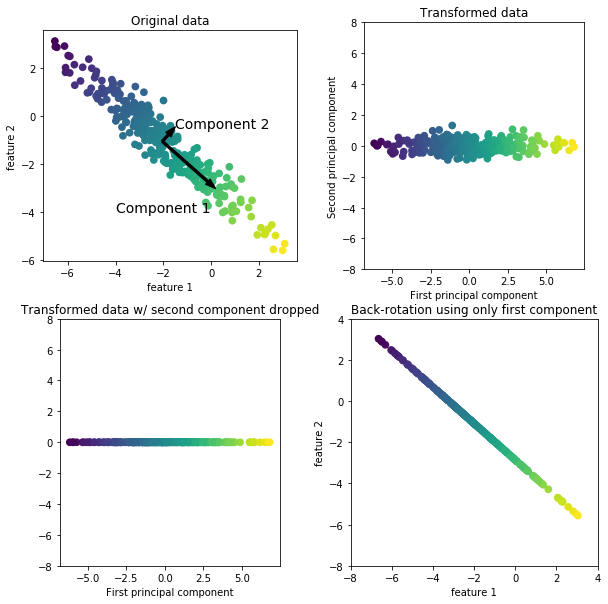

In [2]:
 mglearn.plots.plot_pca_illustration()

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

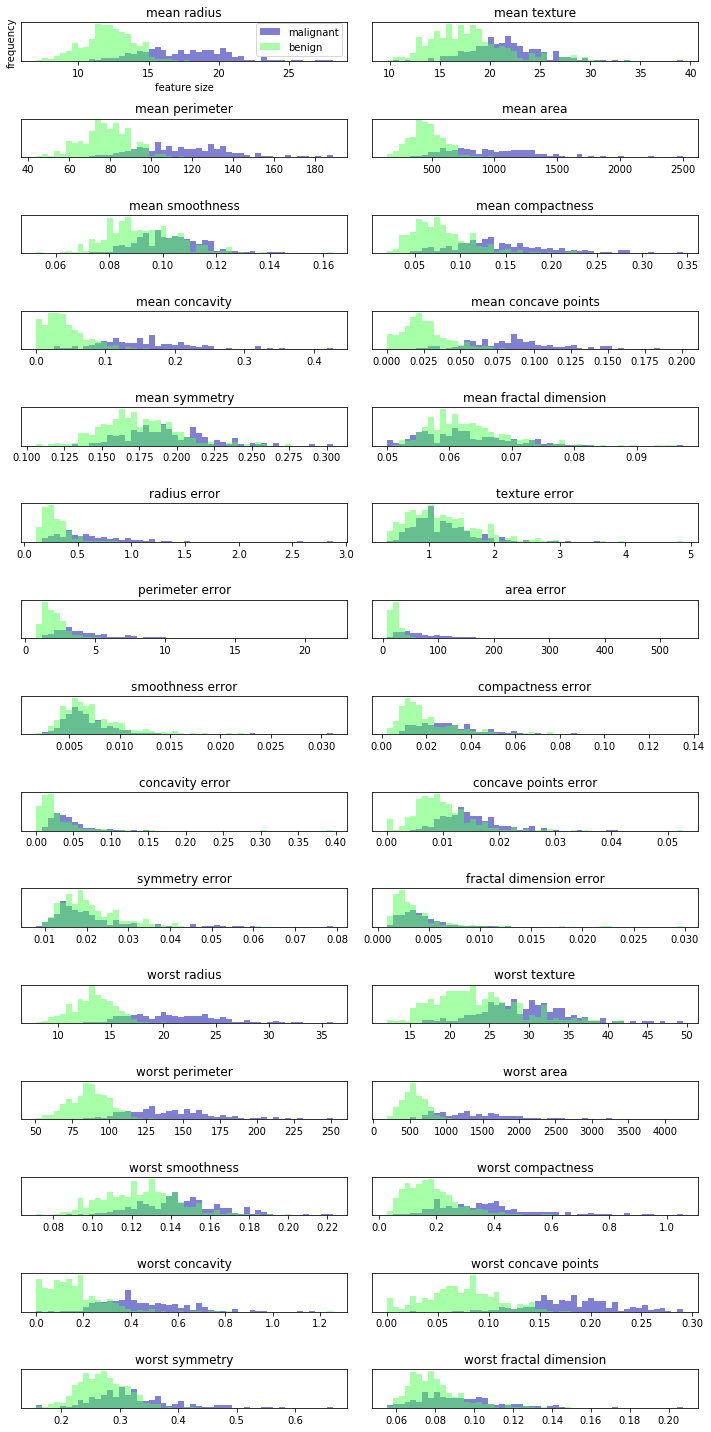

In [9]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("feature size")
ax[0].set_ylabel("frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [14]:
print(X_scaled[0,:])

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]


In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
x_pca=pca.transform(X_scaled)
print(X_scaled,'\n',X_scaled.shape,x_pca.shape)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]] 
 (569, 30) (569, 2)


Text(0, 0.5, 'second pca')

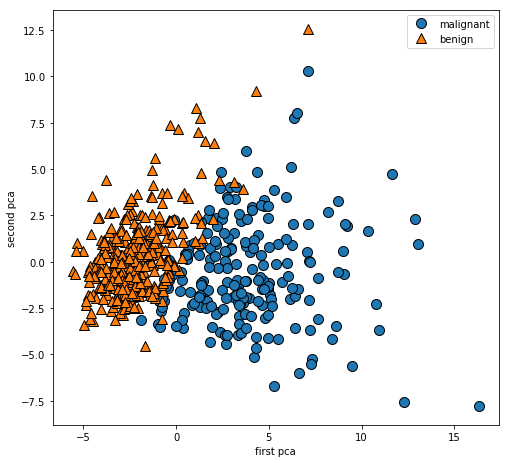

In [21]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(x_pca[:, 0], x_pca[:, 1], cancer.target)
plt.legend(["malignant", "benign"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("first pca")
plt.ylabel("second pca")

In [23]:
print("PCA : {}".format(pca.components_.shape))

PCA : (2, 30)


In [24]:
print("PCA : {}".format(pca.components_))

PCA : [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'pca')

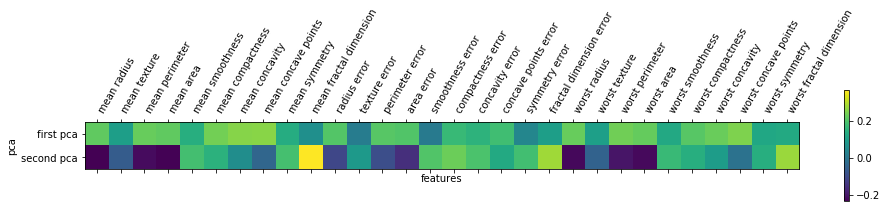

In [25]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["first pca", "second pca"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left')
plt.xlabel("features")
plt.ylabel("pca")

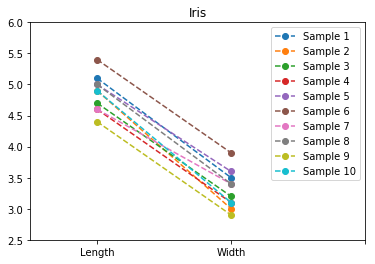

In [26]:
from sklearn.datasets import load_iris
import seaborn as sns
iris = load_iris()
N = 10 # 10
X = iris.data[:N, :2] #
plt.plot(X.T, 'o--')
plt.xticks(range(4), ["Length", "Width"])
plt.xlim(-0.5, 2)
plt.ylim(2.5, 6)
plt.title("Iris")
plt.legend(["Sample {}".format(i + 1) for i in range(N)])
plt.show()

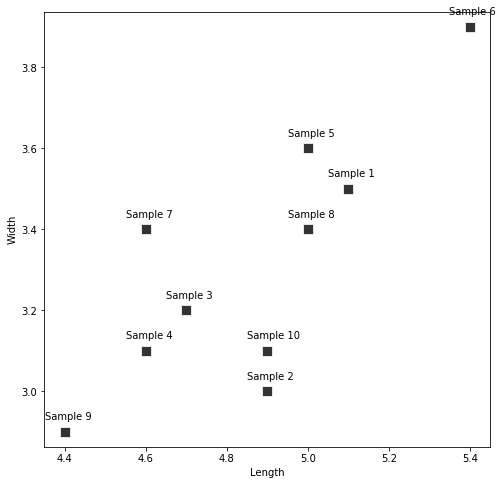

In [27]:
import pandas as pd
plt.figure(figsize=(8,8))
ax = sns.scatterplot(0,1,data=pd.DataFrame(X),s=100, color='.2',marker='s')
for i in range(N):
    ax.text(X[i,0]-0.05, X[i,1]+0.03,'Sample {}'.format(i+1))
plt.xlabel('Length')
plt.ylabel('Width')
plt.axis('equal')
plt.show()

In [28]:
pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

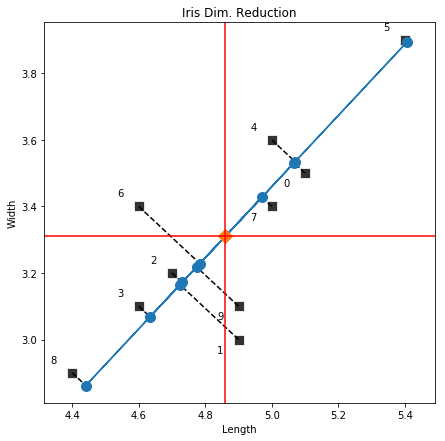

In [29]:
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", \
marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "{}".format(i))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')
plt.grid(False)
plt.xlabel("Length")
plt.ylabel("Width")
plt.title("Iris Dim. Reduction")
plt.axis("equal")
plt.show()


In [30]:
X = iris.data[:, [2,3]] #2,3
Y = iris.target

In [31]:
NUM = 100
select = np.random.permutation(150)
Xtr, Ytr = X[select[:NUM]], Y[select[:NUM]]
Xte, Yte = X[select[NUM:]], Y[select[NUM:]]
print(Xtr.shape)
print(Xte.shape)

(100, 2)
(50, 2)


In [36]:
def prn_pca(pca):
    print('Components, Ratio, Eigen Value, Singular Value')
for c,r,e,s in zip(pca.components_, pca.explained_variance_ratio_, pca.explained_variance_, pca.singular_values_):
    print('%s, %.3f, %.3f, %.3f' % (c, r, e, s))

[0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394], 0.443, 13.305, 86.932
[-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947], 0.190, 5.701, 56.907


In [37]:
prn_pca(pca)

Components, Ratio, Eigen Value, Singular Value


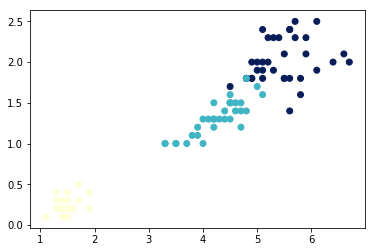

In [38]:
plt.scatter(Xtr[:, 0], Xtr[:, 1], c=Ytr, cmap='YlGnBu')

In [39]:
Xtr2 = pca.transform(Xtr)
plt.scatter(Xtr2[:, 0], Xtr2[:, 1], c=Ytr, cmap='YlGnBu')

ValueError: operands could not be broadcast together with shapes (100,2) (30,) 

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test = train_test_split(cancer.data,cancer.target,test_size=0.3)

In [80]:
Logmodel = LogisticRegression()
Logmodel.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [81]:
prediction = Logmodel.predict(x_test)

In [82]:
Logmodel.score(x_test,y_test)

0.9532163742690059

In [83]:
pca = PCA(n_components=4)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

PCA_Logmodel = LogisticRegression()
PCA_Logmodel.fit(x_train_pca,y_train)

preds = PCA_Logmodel.predict(x_test_pca)
score = PCA_Logmodel.score(x_test_pca,y_test)
print(score)

0.9415204678362573


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [84]:
x_train_pca.shape

(398, 4)

In [85]:
x_train.shape

(398, 30)

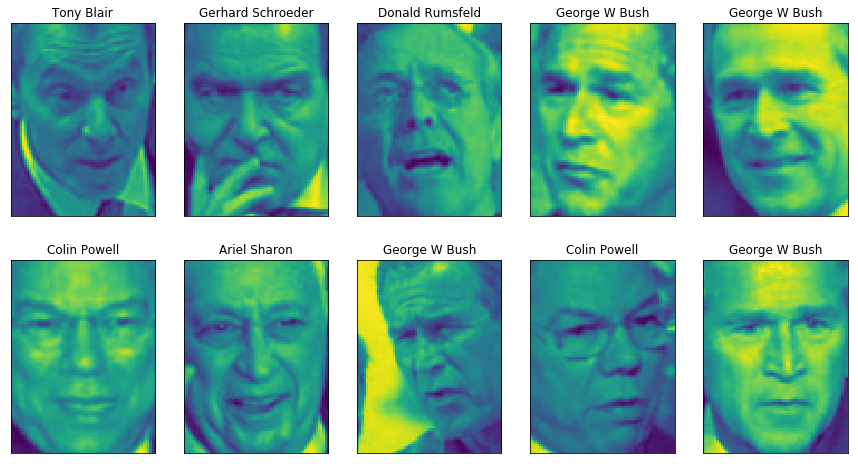

In [86]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=50,resize=0.7)
image_shape = people.images[0].shape
fig, axes = plt.subplots(2, 5, figsize=(15, 8),subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [87]:
print(image_shape)

(87, 65)


In [88]:
print(people.images[0])

[[ 79.        83.333336  89.       ...  68.333336  74.666664  76.      ]
 [ 85.        82.666664  90.666664 ...  58.        73.        80.666664]
 [ 88.333336  88.333336  95.       ...  47.333332  64.333336  78.      ]
 ...
 [ 47.666668  49.        48.333332 ... 143.       115.        89.      ]
 [ 47.666668  48.        47.333332 ... 149.       136.33333  102.666664]
 [ 45.666668  48.        47.       ... 153.33333  145.33333  113.333336]]


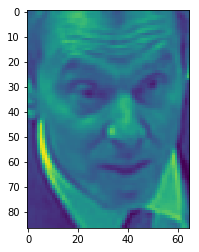

In [89]:
plt.imshow(people.images[0])

In [90]:
people.target[0:10], people.target_names[people.target[0:10]]

(array([11,  4,  2,  3,  3,  1,  0,  3,  1,  3], dtype=int64),
 array(['Tony Blair', 'Gerhard Schroeder', 'Donald Rumsfeld',
        'George W Bush', 'George W Bush', 'Colin Powell', 'Ariel Sharon',
        'George W Bush', 'Colin Powell', 'George W Bush'], dtype='<U17'))

In [91]:
print("people.images.shape: {}".format(people.images.shape))
print(" : {}".format(len(people.target_names)))

people.images.shape: (1560, 87, 65)
 : 12


In [92]:
counts = np.bincount(people.target)

In [94]:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print()

Ariel Sharon               77 Colin Powell              236 Donald Rumsfeld           121 
George W Bush             530 Gerhard Schroeder         109 Hugo Chavez                71 
Jacques Chirac             52 Jean Chretien              55 John Ashcroft              53 
Junichiro Koizumi          60 Serena Williams            52 Tony Blair                144 


In [95]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
# 0~255 0~1 .
# () MinMaxScaler .
X_people = X_people / 255.

In [96]:
from sklearn.neighbors import KNeighborsClassifier
#
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1- : {:.2f}".format(knn.score(X_test, y_test)))

1- : 0.37


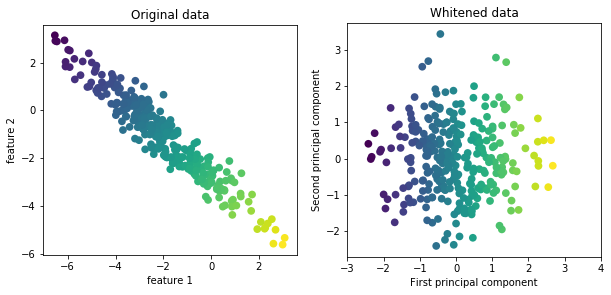

In [97]:
mglearn.plots.plot_pca_whitening()

In [98]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [99]:
print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (450, 100)


In [100]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print(" : {:.2f}".format(knn.score(X_test_pca, y_test)))

 : 0.43


In [101]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)
